In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import simplefilter
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

In [3]:
mv_data = pd.read_csv('mv_yr.csv')
link = pd.read_csv('links.csv')
rt_data = pd.read_csv('ratings.csv')
tag = pd.read_csv('tags.csv')

In [5]:
for xz in [mv_data, rt_data, link, tag]:
  print (xz.head())
  print("+" * 55)

   movieId                        title     genres  Year
0        1                    Toy Story  Adventure  1995
1        2                      Jumanji  Adventure  1995
2        3             Grumpier Old Men     Comedy  1995
3        4            Waiting to Exhale     Comedy  1995
4        5  Father of the Bride Part II     Comedy  1995
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
   userId  movieId               tag   timestamp
0       3      260           classic  1

In [7]:
print(f"Count, unique values, and frequency distribution of categorical columns:")
print(f"{mv_data['genres'].value_counts()}")

Count, unique values, and frequency distribution of categorical columns:
genres
Drama                 15319
Comedy                13670
Action                 7348
Documentary            5206
(no genres listed)     5062
Horror                 3455
Crime                  3034
Adventure              2493
Animation              2089
Children               1367
Thriller                937
Western                 560
Sci-Fi                  510
Romance                 401
Mystery                 393
Fantasy                 343
Musical                 102
War                      96
Film-Noir                37
IMAX                      1
Name: count, dtype: int64


In [8]:
print (mv_data.shape, rt_data.shape, link.shape, tag.shape)

(62423, 4) (25000095, 4) (62423, 3) (1093360, 4)


In [9]:
print(f"Data Types of each Column: ")
for cz in [mv_data, rt_data, link, tag]:
  print (cz.dtypes)
  print("+" * 25)

Data Types of each Column: 
movieId     int64
title      object
genres     object
Year       object
dtype: object
+++++++++++++++++++++++++
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
+++++++++++++++++++++++++
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object
+++++++++++++++++++++++++
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object
+++++++++++++++++++++++++


In [10]:
print("Descriptive statistics of numerical columns:")
for zz in [mv_data, rt_data, link, tag]:
  print(zz.describe())
  print("+" * 65)


Descriptive statistics of numerical columns:
             movieId
count   62423.000000
mean   122220.387646
std     63264.744844
min         1.000000
25%     82146.500000
50%    138022.000000
75%    173222.000000
max    209171.000000
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
             userId       movieId        rating     timestamp
count  2.500010e+07  2.500010e+07  2.500010e+07  2.500010e+07
mean   8.118928e+04  2.138798e+04  3.533854e+00  1.215601e+09
std    4.679172e+04  3.919886e+04  1.060744e+00  2.268758e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.196000e+03  3.000000e+00  1.011747e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.198868e+09
75%    1.215570e+05  8.623000e+03  4.000000e+00  1.447205e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
             movieId        imdbId         tmdbId
count   62423.000000  6.24

# _**DATA VISUALIZATIONS**_

<Axes: xlabel='Year', ylabel='Density'>

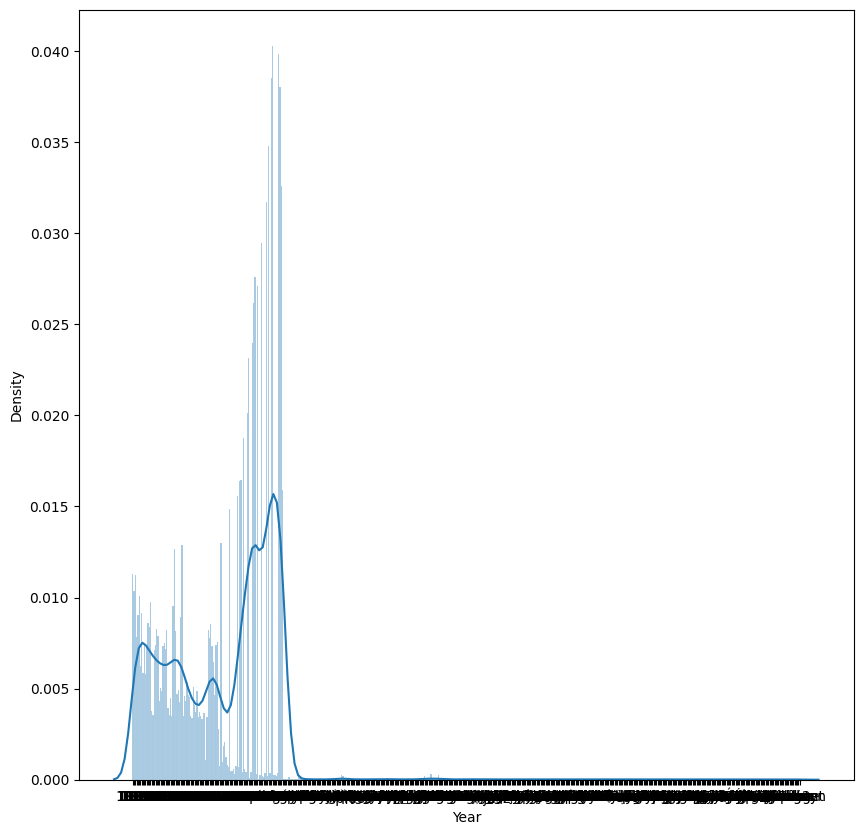

In [11]:
# sns.distplot(mv_data['Year'] )
plt.figure(figsize = (10,10))
sns.histplot(
    mv_data["Year"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

<Figure size 1000x1000 with 0 Axes>

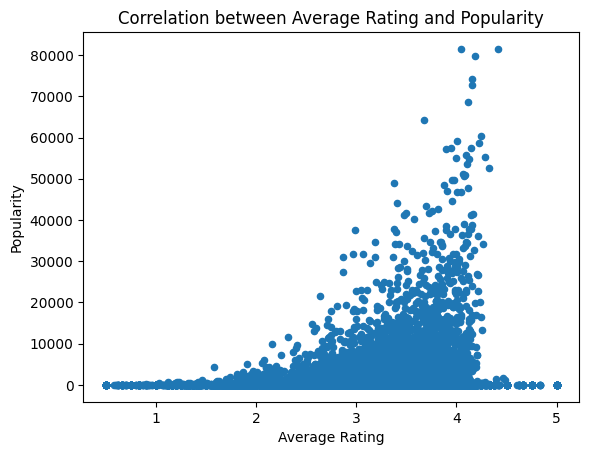

In [12]:
popularity = rt_data.groupby('movieId').size()
avg_ratings_per_movie = rt_data.groupby('movieId')['rating'].mean()
ratings_popularity = pd.concat([avg_ratings_per_movie, popularity], axis=1, keys=['Average Rating', 'Popularity'])
plt.figure(figsize = (10,10))
ratings_popularity.plot.scatter(x='Average Rating', y='Popularity')
plt.xlabel('Average Rating')
plt.ylabel('Popularity')
plt.title('Correlation between Average Rating and Popularity')
plt.show()

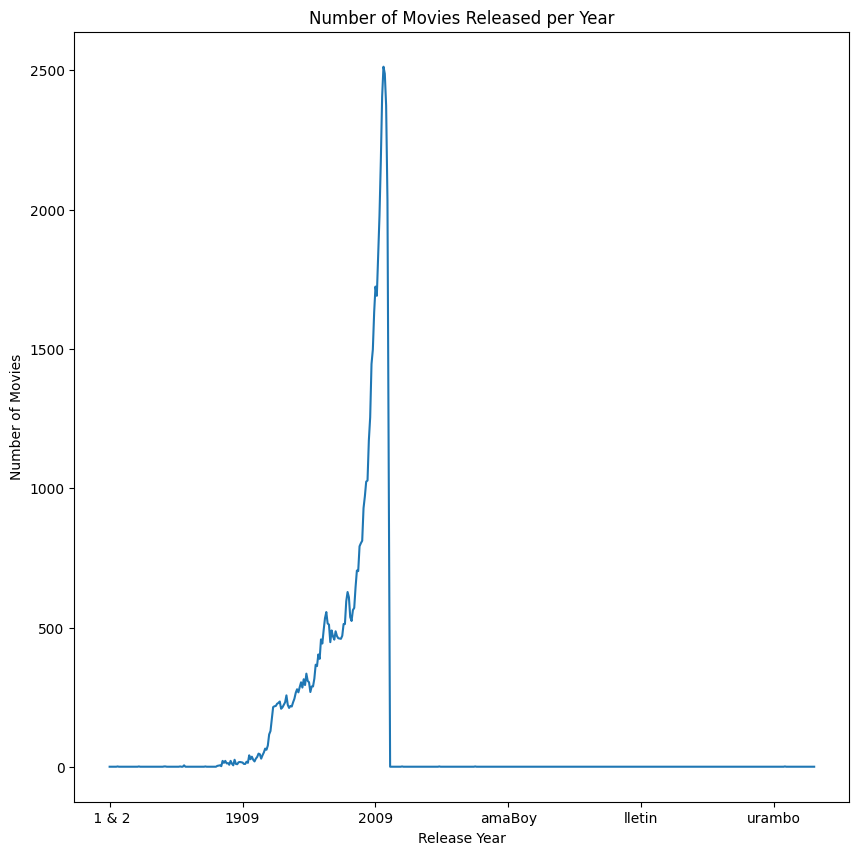

In [13]:
plt.figure(figsize = (10,10))
mv_data['Year'].value_counts().sort_index().plot()
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year')
plt.show()


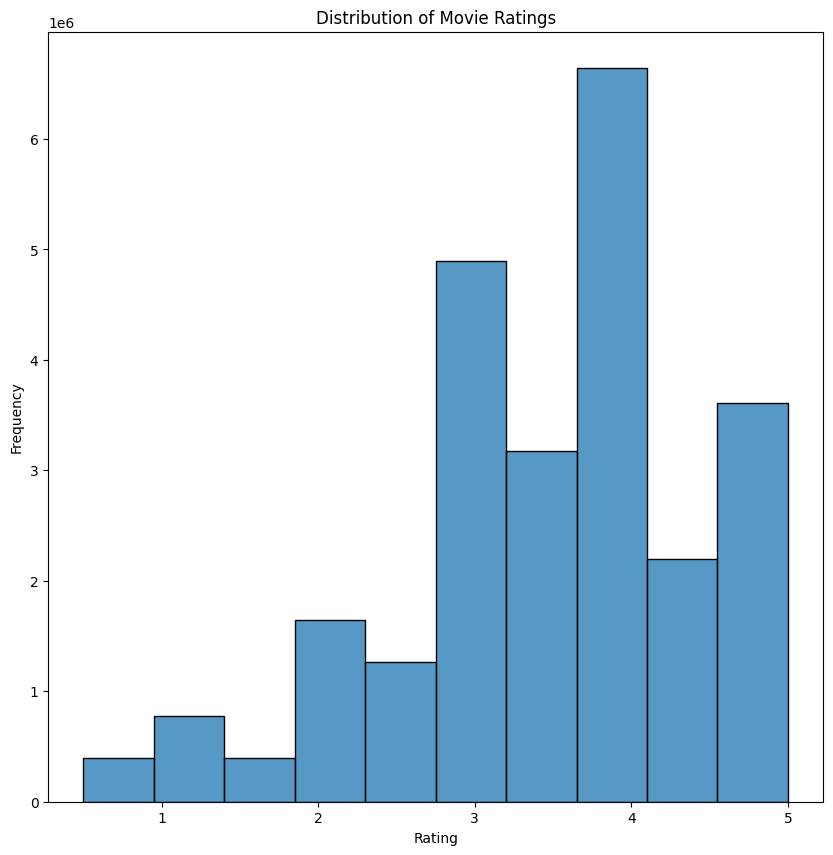

In [14]:
plt.figure(figsize = (10,10))
sns.histplot(data=rt_data.rating, bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

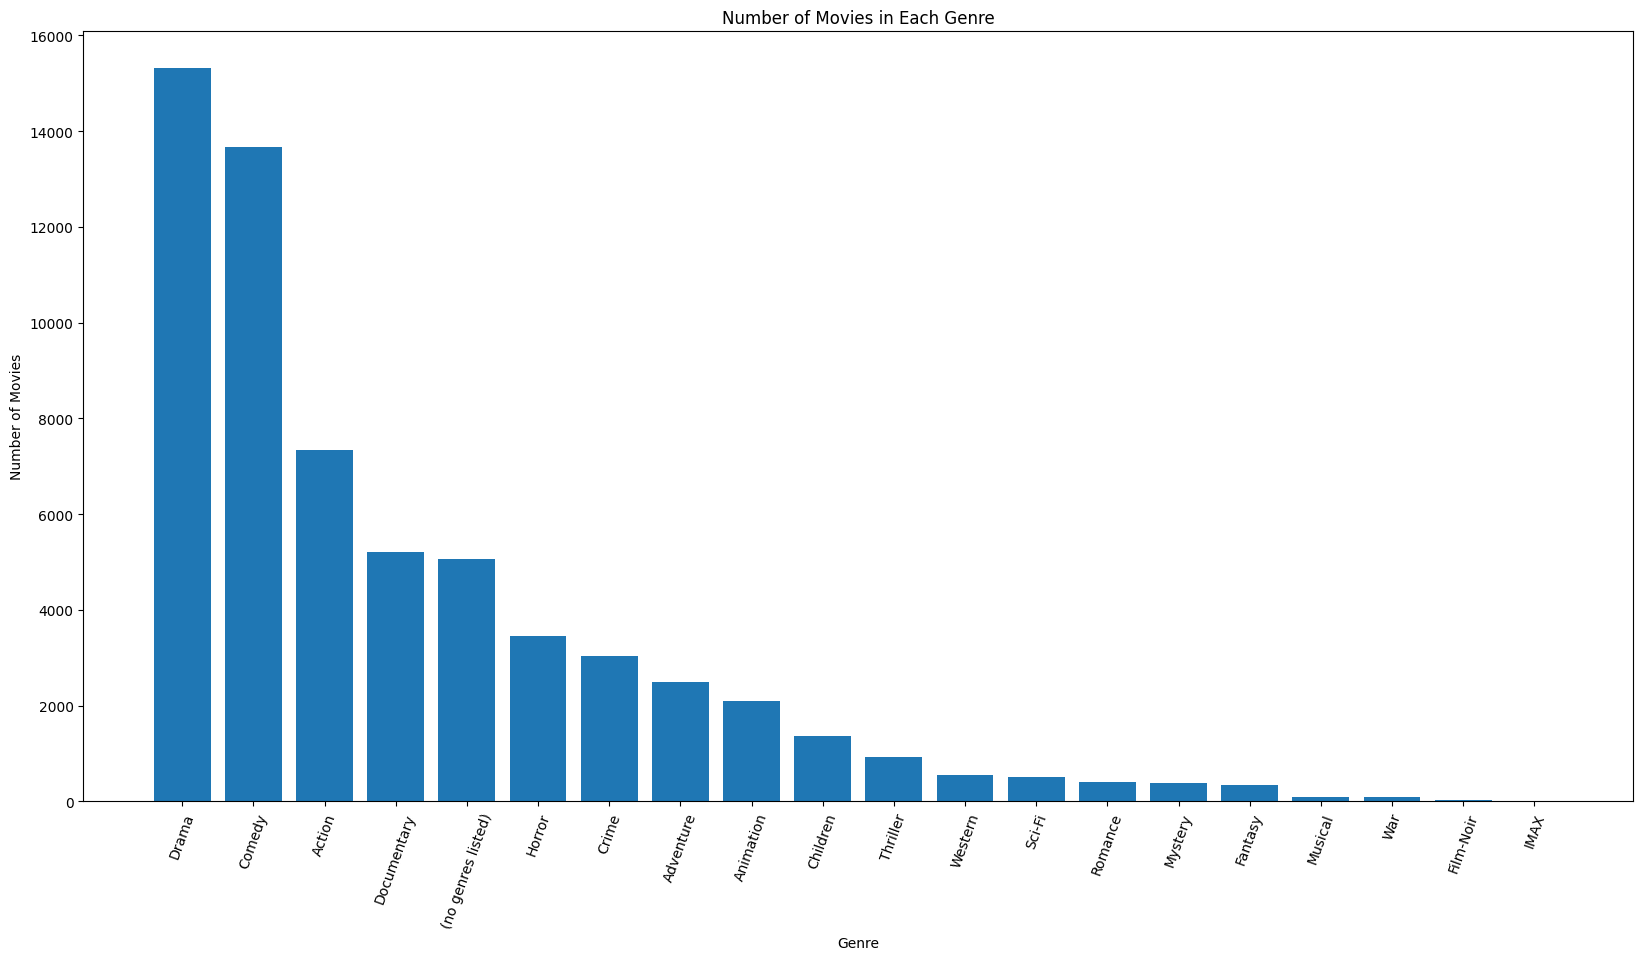

In [15]:
# genre_counts = mv_data.groupby('genres').size().sort_values(ascending=False)
plt.figure(figsize=(20,10))
genre_counts = mv_data.genres.value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Genre')
plt.xticks(rotation=70)
plt.show()

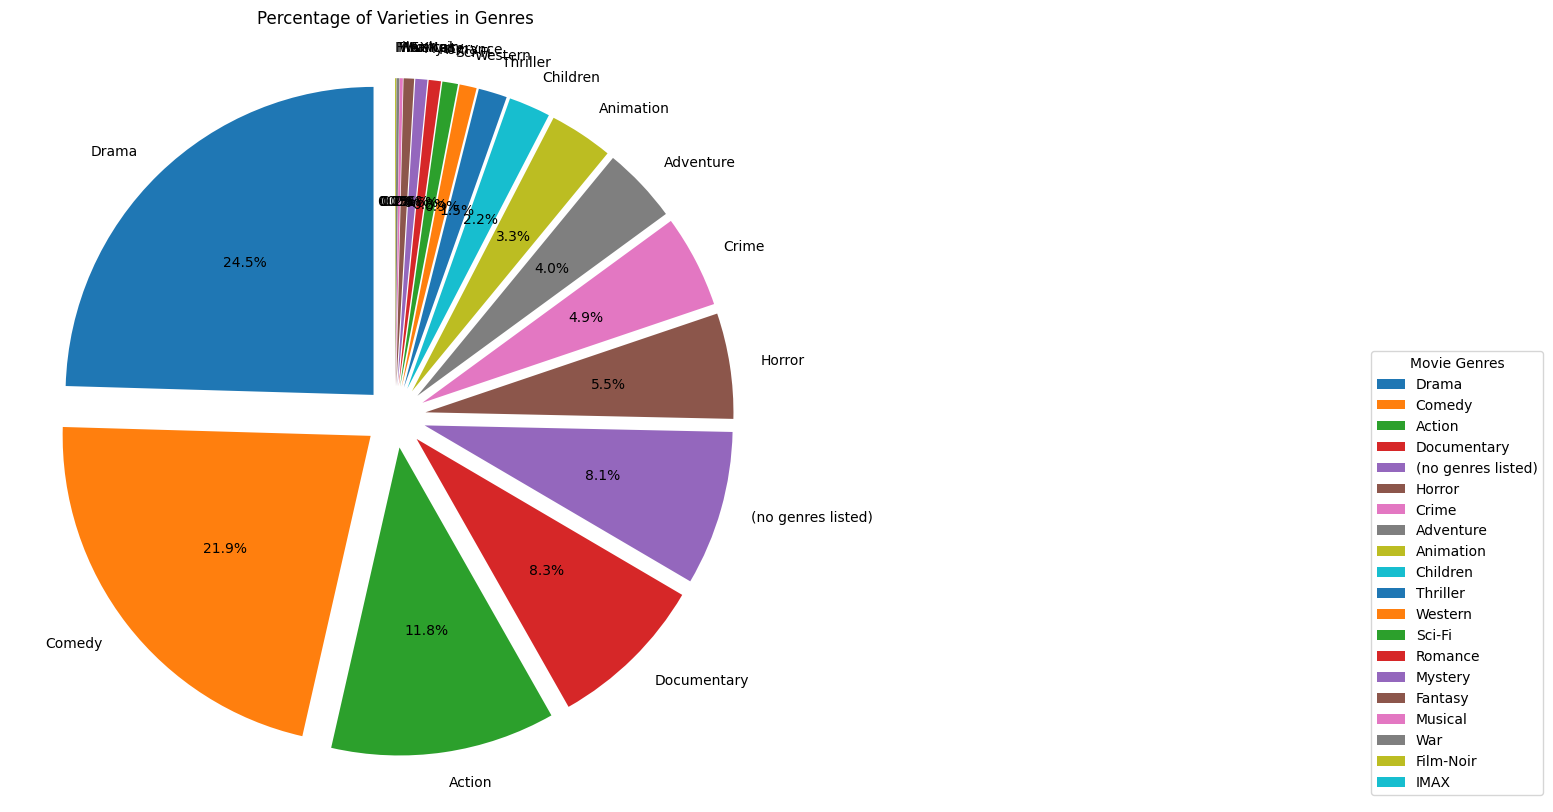

In [16]:
plt.figure(figsize = (10,10))
data = mv_data['genres']
# Count the frequency of each string
counts = pd.Series(data).value_counts()
explode = explode = [0.1] * len(counts)
plt.pie(counts, labels=counts.index, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Varieties in Genres')
plt.legend(title='Movie Genres', loc='lower right', bbox_to_anchor=(2, 0))
plt.show()


<Axes: >

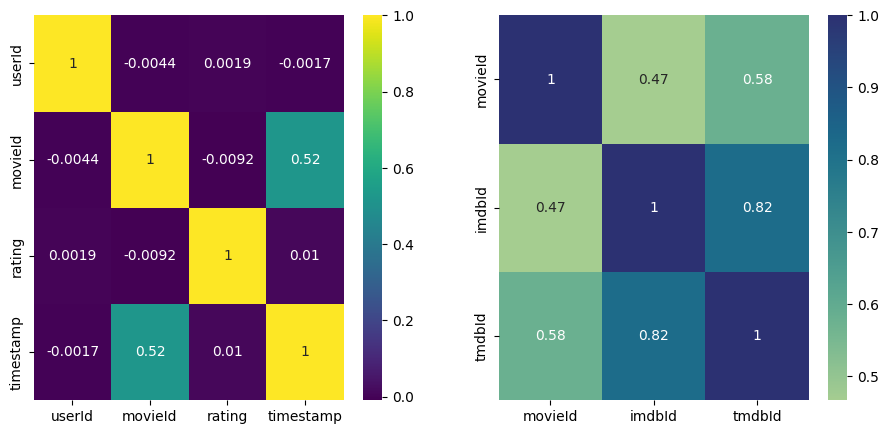

In [17]:
plt.figure(figsize=(11, 11))
plt.subplot(2,2,1)
sns.heatmap(data = rt_data.corr(),annot = True, cmap = 'viridis' )
plt.subplot(2,2,2)
sns.heatmap(data = link.corr(),annot = True, cmap = 'crest' )

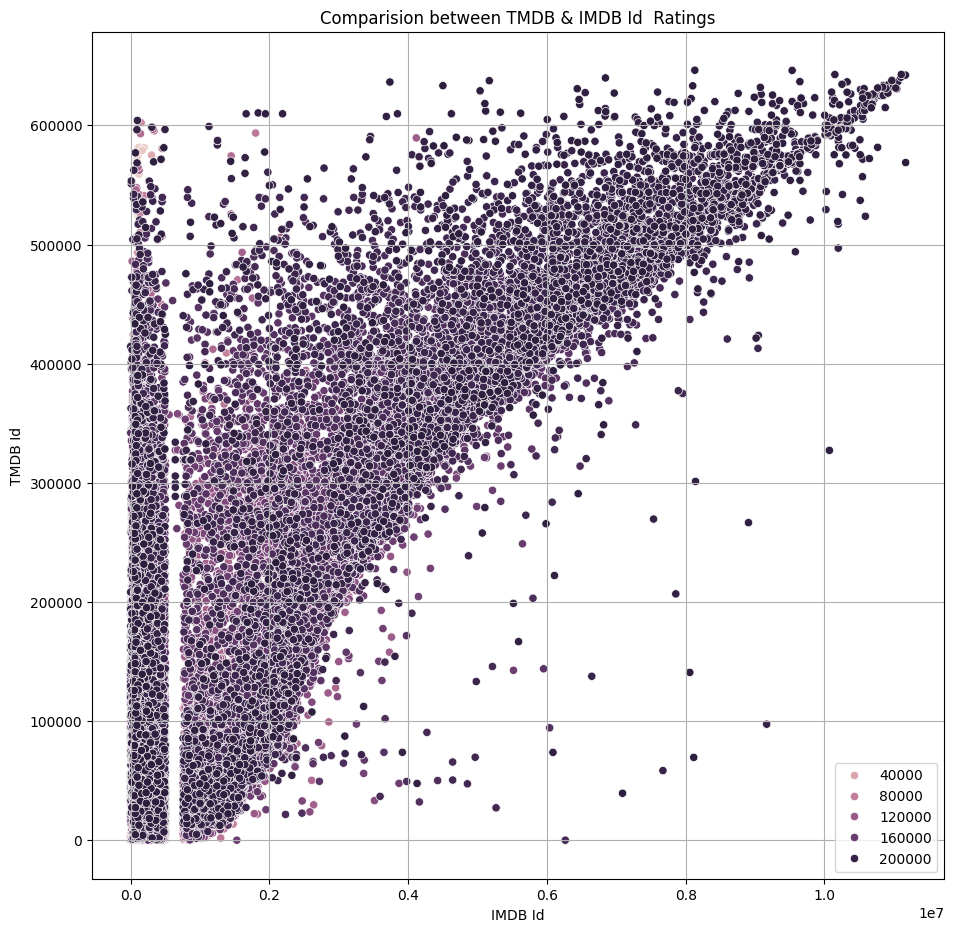

In [16]:
plt.figure(figsize = (11, 11))
plt.title("Comparision between TMDB & IMDB Id  Ratings")
plt.grid()
sns.scatterplot(data=link, x="imdbId", y="tmdbId", hue="movieId")
plt.xlabel('IMDB Id')
plt.ylabel('TMDB Id')
plt.legend()
plt.show()

In [18]:
tag.nunique()

userId        14592
movieId       45251
tag           73050
timestamp    907730
dtype: int64

In [19]:

# Merge the ratings and movies data
merged_df = pd.merge(rt_data, mv_data, on='movieId')

# Group the data by movie title and count the number of ratings
ratings_count = merged_df.groupby('title').size().reset_index(name='ratings_count')

# Sort the data by the number of ratings in descending order
ratings_count = ratings_count.sort_values('ratings_count', ascending=False)
plt.figure(figsize=(10, 8))
# plt.bar(ratings_count['title'], ratings_count['ratings_count'])
sns.barplot(x=ratings_count['title'], y=ratings_count['ratings_count'])
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings for Each Movie')
plt.show()

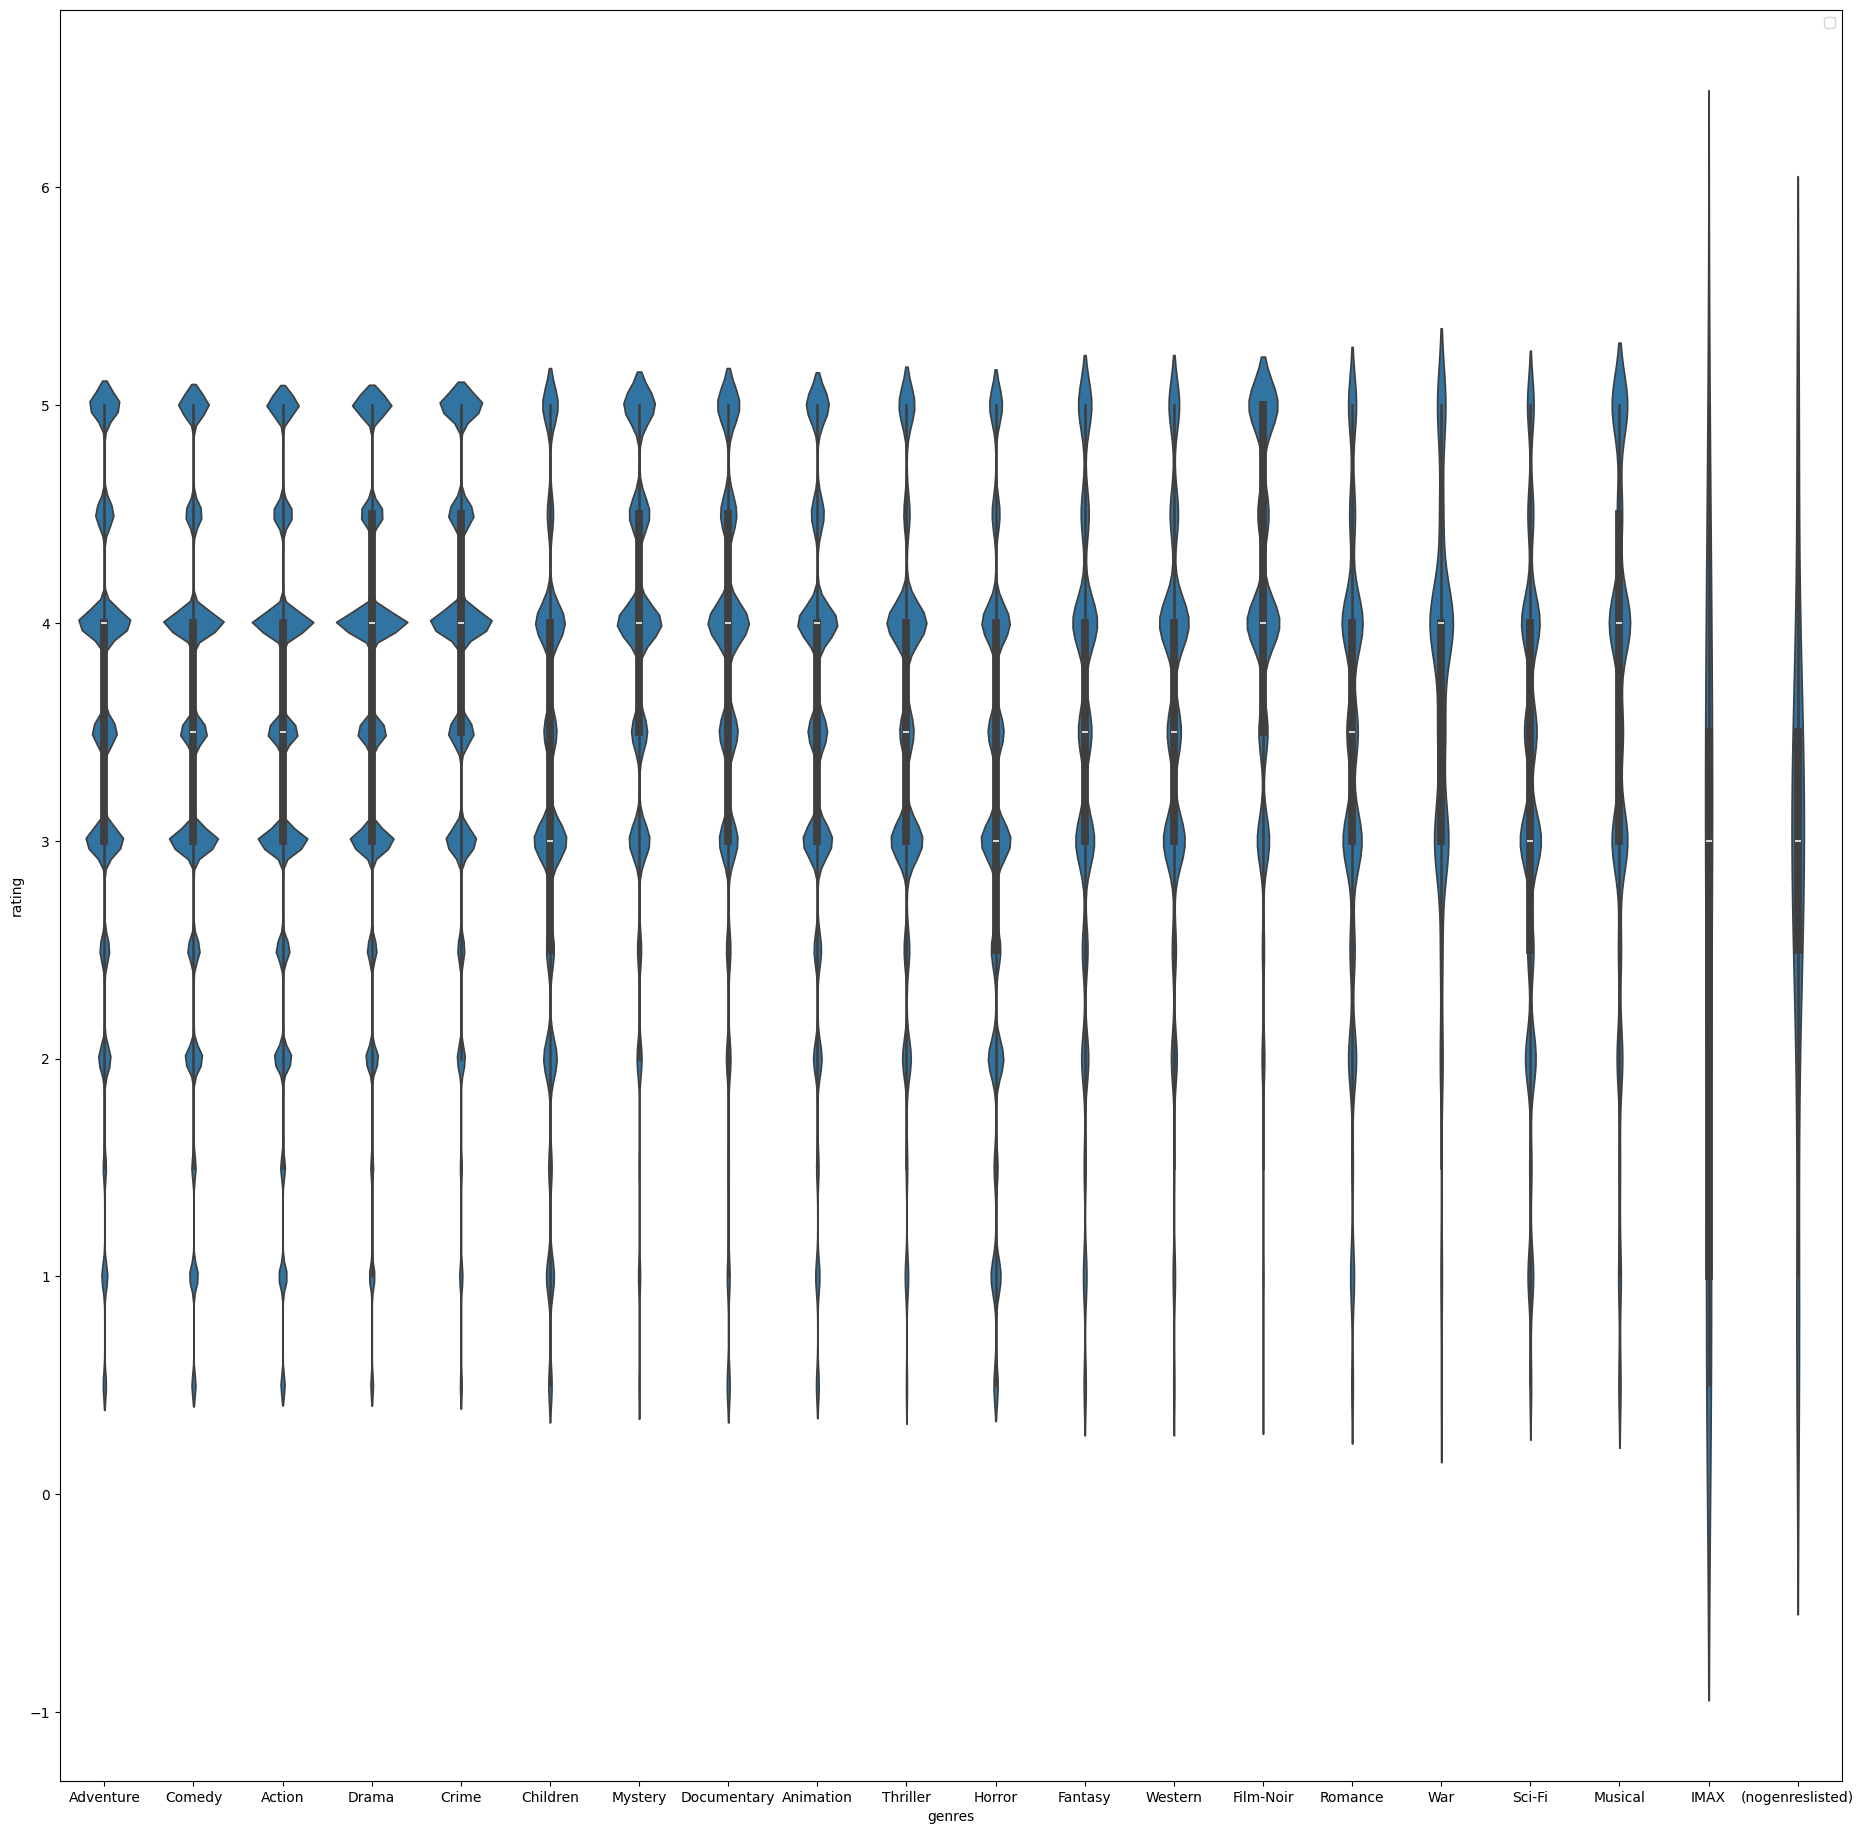

In [20]:
plt.figure(figsize = (23,23))
df = pd.merge(mv_data, rt_data, on='movieId')
plt.legend("violinplot of the distribution of ratings for each movie genre")
sns.violinplot(x='genres', y='rating', data=df)
plt.show()

In [21]:
plt.figure(figsize=(25, 15))
df = pd.merge(mv_data, rt_data, on='movieId')

# Select a subset of the columns
columns = ['rating', 'userId', 'movieId']

# Create the scatterplot matrix
sns.pairplot(df[columns])
# By default, this function will create a grid of Axes such that each numeric 
# variable in data will by shared across the y-axes across a single row and the x-axes across a single column.
# The diagonal plots are treated differently: 
# a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

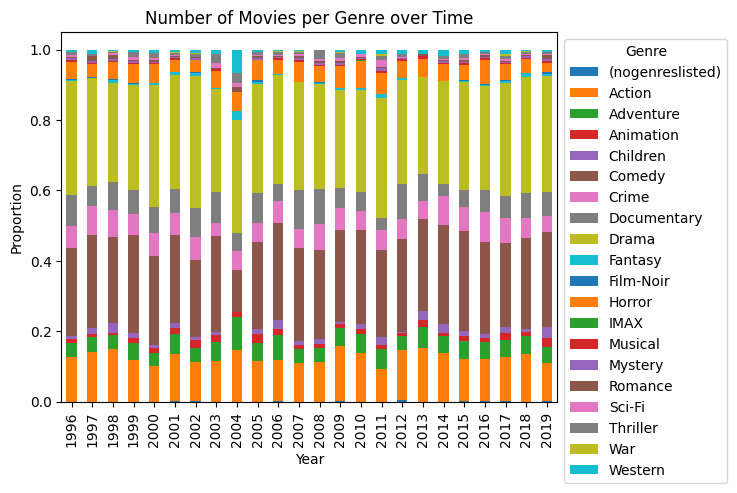

In [ ]:
genre_counts_over_time = pd.crosstab(pd.to_datetime(rt_data.timestamp, unit='s').dt.year, mv_data.genres).apply(lambda x: x / x.sum(), axis=1)
genre_counts_over_time.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Number of Movies per Genre over Time')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()


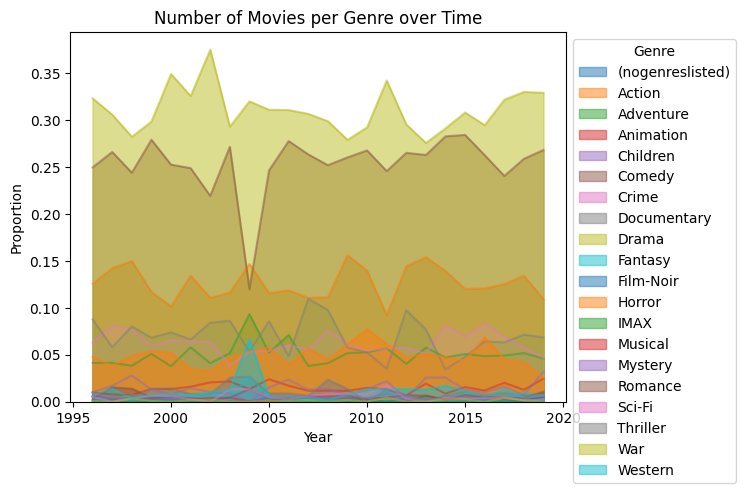

In [ ]:
genre_counts_over_time.plot(kind='area', stacked=False)
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Number of Movies per Genre over Time')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

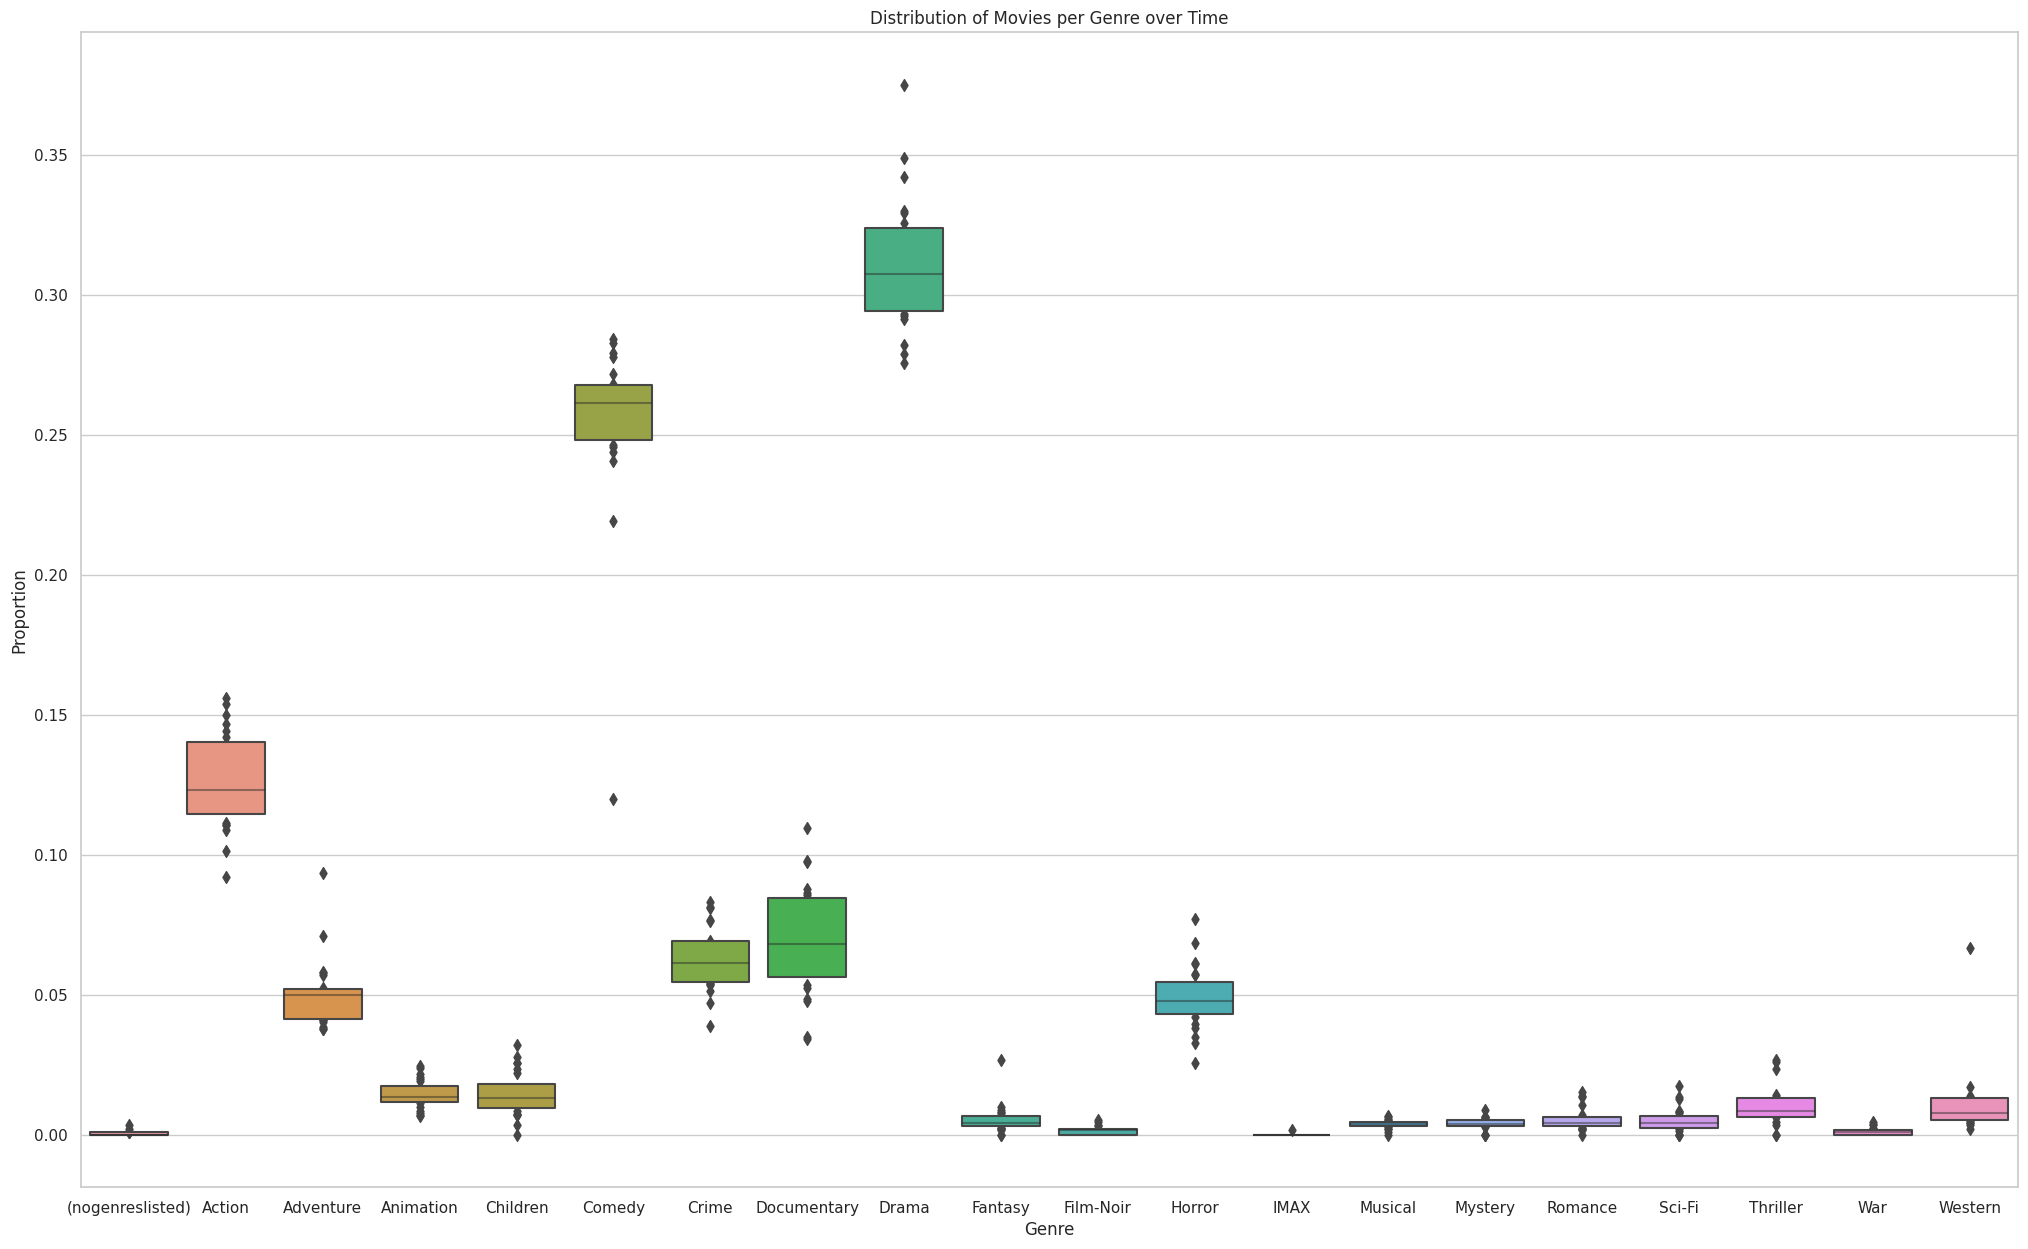

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(25,15))
sns.boxenplot(data=genre_counts_over_time)
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.title('Distribution of Movies per Genre over Time')
plt.show()



# *Recommender*

---



In [4]:
mv_data = pd.read_csv('mv_yr.csv',  nrows = 10000)

cv = CountVectorizer()
# Create the bag-of-words model for the genres column
genres_matrix = cv.fit_transform(mv_data['genres'].values.astype('U'))
# Compute the cosine similarity matrix for the genres
cosine_sim = cosine_similarity(genres_matrix)

# Define a function to get the top recommended movies based on a movie title
def get_similar_movies(title, cosine_sim, mv_data):
    # Get the index of the movie title
    index = mv_data[mv_data['title'] == title].index[0]

    # Get the cosine similarity scores for all movies
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the scores by descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 similar movies
    recommender = [mv_data.iloc[score[0]]['title'] for score in sim_scores[0:10]]
    return recommender

# Asking the user input for a movie title
title = input("Enter a movie title: ")

# Getting the top 10 similar movies
recommender = get_similar_movies(title, cosine_sim, mv_data)

rec_movies = []

# Print the top similar movies
print(f"Top 10 similar movies to '{title}':")
for movie in recommender:
    rec_movies.append(movie)
    print(movie)

print ('___Recommended Movies Generated___')

Top 10 similar movies to 'Ponette':
Nixon
Sense and Sensibility
Powder
Leaving Las Vegas
Othello
Persuasion
Dangerous Minds
Carrington
Cry, the Beloved Country
Richard III
___Recommended Movies Generated___


In [5]:
mv_data = pd.read_csv('mv_yr.csv', nrows = 10000)
tag = pd.read_csv('tags.csv', nrows = 10000)

# Merge the mv_data and tag dataframes based on 'movieId'
merged_df = pd.merge(tag, mv_data, on='movieId')

# Create the bag-of-words model for the 'tag' column
cv = CountVectorizer()
tag_matrix = cv.fit_transform(merged_df['tag'].values.astype('U'))

# Compute the cosine similarity matrix for the 'tag' column
cosine_sim = cosine_similarity(tag_matrix)

# Define a function to get the top recommended mv_data based on a movie tag
def get_similar_movies(tag, cosine_sim, movies_data):
    try:
        # Get the index of the movie tag
        index = merged_df[merged_df['tag'] == tag].index[0]

        # Get the cosine similarity scores for all mv_data
        sim_scores = list(enumerate(cosine_sim[index]))

        # Sort the scores by descending order
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the top 10 similar mv_data
        top_similar_movies = sim_scores[1:11]  # Exclude the first movie itself

        # Get the movie titles of the top similar mv_data
        movie_titles = [movies_data[movies_data['movieId'] == merged_df.iloc[score[0]]['movieId']]['title'].values[0] for score in top_similar_movies]
        
        return movie_titles

    except IndexError:
        return []  # Return an empty list if no matching mv_data are found

# Get the user input for a movie tag
tag_input = input("Enter a movie tag: ")

# Get the top 10 similar mv_data
recommended_movies = get_similar_movies(tag_input, cosine_sim, mv_data)

if recommended_movies:
    # Print the top similar mv_data
    print(f"Top 10 similar Movies to '{tag_input}':")
    for movie in recommended_movies:
        print(movie)
else:
    print("No similar  found for the provided tag.")

print (f"___Recommended Movies By Tags Generated___")

Top 10 similar Movies to 'Horror':
Interview with the Vampire: The Vampire Chronicles
Silence of the Lambs, The
Aliens
Alien
Silence of the Lambs, The
Evil Dead, The
Cube
Ring, The
Star Wars: Episode IV - A New Hope
Star Wars: Episode IV - A New Hope
___Recommended Movies By Tags Generated___


In [7]:
mv_data = pd.read_csv('mv_yr.csv', nrows=10000)
rating = pd.read_csv('ratings.csv', nrows=10000)

# Merge the mv_data and rating dataframes based on 'movieId'
merged_df = pd.merge(rating, mv_data, on='movieId')

# Pivot the merged dataframe to create a user-movie rating matrix
user_rating_matrix = merged_df.pivot_table(index='userId', columns='title', values='rating').fillna(0)

# Compute the cosine similarity matrix for the user-rating matrix
cosine_sim = cosine_similarity(user_rating_matrix)

# Define a function to get the top recommended movies based on user ratings
def get_similar_movies(movie_title, cosine_sim, movies_data):
    try:
        # Get the index of the movie title
        index = movies_data[movies_data['title'] == movie_title].index[0]

        # Get the cosine similarity scores for all movies
        sim_scores = list(enumerate(cosine_sim[index]))

        # Sort the scores by descending order
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the top 10 similar movies
        top_similar_movies = sim_scores[1:11]  # Exclude the first movie itself

        # Get the titles of the top similar movies
        similar_movie_titles = [movies_data.iloc[score[0]]['title'] for score in top_similar_movies]

        return similar_movie_titles

    except IndexError:
        return []  # Return an empty list if no matching movies are found

# Get the user input for a movie title
movie_input = input("Enter a movie title: ")

# Get the top 10 similar movies based on user ratings
recommended_movies = get_similar_movies(movie_input, cosine_sim, mv_data)

if recommended_movies:
    # Print the top similar movies
    print(f"Top 10 similar movies to '{movie_input}':")
    for movie in recommended_movies:
        print(movie)
else:
    print("No similar movies found for the provided title.")

print (f"_____Recommended Movies By Ratings Generated_____")

No similar movies found for the provided title.
_____Recommended Movies By Ratings Generated_____


In [8]:
mv_data = pd.read_csv('mv_yr.csv', nrows=10000)
rating = pd.read_csv('ratings.csv', nrows=10000)

# Merge the mv_data and rating dataframes based on 'movieId'
merged_df = pd.merge(rating, mv_data, on='movieId')

# Pivot the merged dataframe to create a movie-user rating matrix
movie_rating_matrix = merged_df.pivot_table(index='title', columns='userId', values='rating').fillna(0)

# Compute the cosine similarity matrix for the movie-rating matrix
cosine_sim = cosine_similarity(movie_rating_matrix)

# Define a function to get the top recommended movies based on ratings
def get_similar_movies(rating_input, cosine_sim, movies_data):
    try:
        # Get the index of the rating input
        index = merged_df[merged_df['rating'] == rating_input].index[0]

        # Get the cosine similarity scores for all movies
        sim_scores = list(enumerate(cosine_sim[index]))

        # Sort the scores by descending order
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the top 10 similar movies
        top_similar_movies = sim_scores[1:11]  # Exclude the first movie itself

        # Get the titles of the top similar movies
        similar_movie_titles = [movies_data.iloc[score[0]]['title'] for score in top_similar_movies]

        return similar_movie_titles

    except IndexError:
        return []  # Return an empty list if no matching movies are found

# Get the user input for a rating
rating_input = float(input("Enter a rating: "))

# Get the top 10 similar movies based on ratings
recommended_movies = get_similar_movies(rating_input, cosine_sim, mv_data)

if recommended_movies:
    # Print the top similar movies
    print(f"Top 10 similar movies to '{rating_input}':")
    for movie in recommended_movies:
        print(movie)
else:
    print("No similar movies found for the provided rating.")


print (f"____Recommended Movies By Rating {rating_input} Generated____")

Top 10 similar movies to '3.0':
Shanghai Triad (Yao a yao yao dao waipo qiao)
Wedding Bell Blues
Smoke
Usual Suspects, The
It Takes Two
Million Dollar Duck, The (a.k.a. $1,000,000 Duck)
Dead Presidents
Stalingrad
Pocahontas
Leaving Las Vegas
____Recommended Movies By Rating 3.0 Generated____
